# 수원화성문화제 (23.10.07~23.10.09 11:00-18:00)

## 1007 (토)

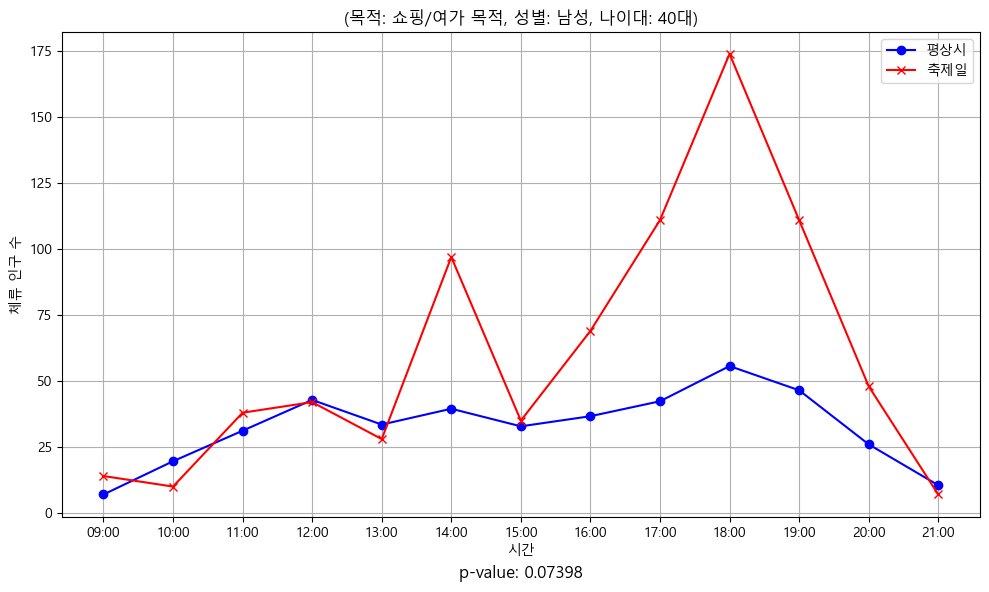

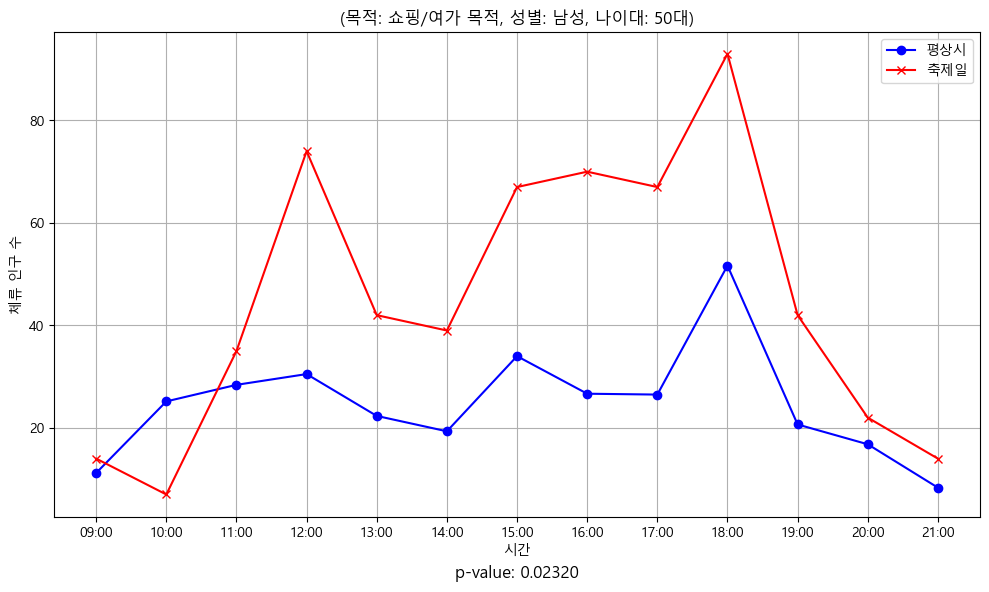

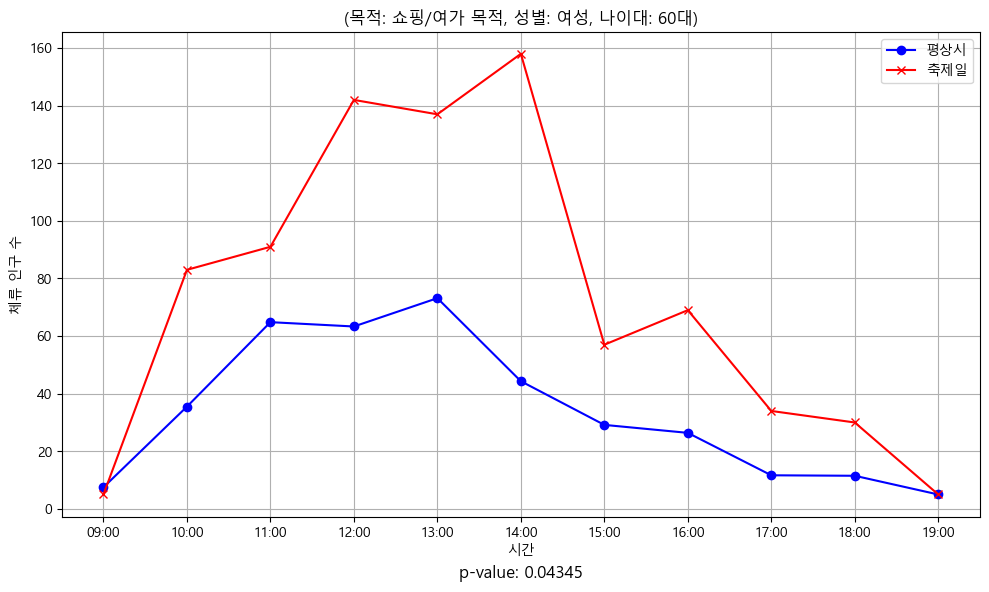

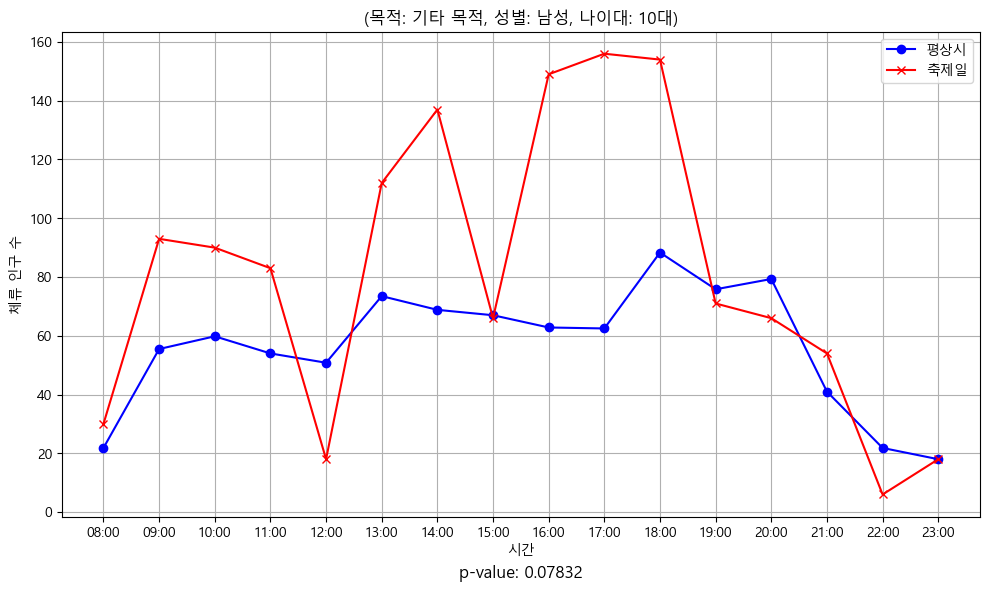

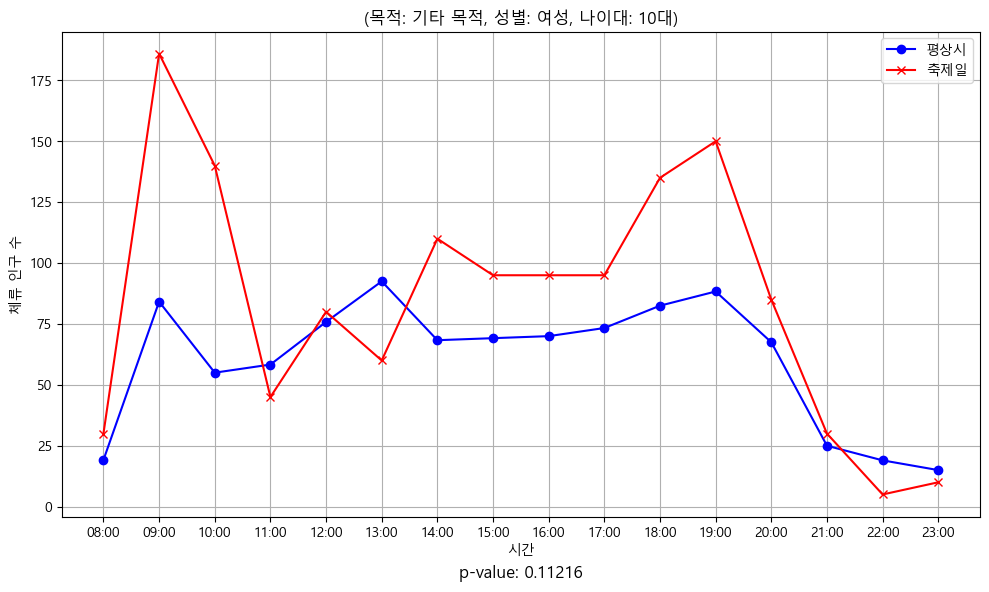

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from scipy import stats
import numpy as np

# 한글 폰트 설정 (malgun 폰트 사용 예시)
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = fm.FontProperties(fname=font_path)
plt.rc('font', family=font_prop.get_name())

# 평상시 데이터 파일 불러오기
df_normal_1 = pd.read_csv(r"csv\od_20230902_1.csv")
df_normal_2 = pd.read_csv(r"csv\od_20230909_1.csv")
df_normal_3 = pd.read_csv(r"csv\od_20230916_1.csv")
df_normal_4 = pd.read_csv(r"csv\od_20230923_1.csv")
df_normal_5 = pd.read_csv(r"csv\od_20230930_1.csv")
df_normal_6 = pd.read_csv(r"csv\od_20231014_1.csv")

# 축제 데이터 파일 불러오기
df_festival = pd.read_csv(r"csv\od_20231007_1.csv")

# 도착지 행정동 코드
dest_hdong_cd_list = [4111574000]

# 분석할 목적 (3: 쇼핑/여가, 4: 기타, 5: 여행)
purposes = [3, 4, 5]

# 성별과 나이대 정의
genders = [0, 1]  # 0: 남성, 1: 여성
ages = list(range(9))  # 0: 9세 이하, 1: 10대, ..., 8: 80세 이상

# 목적별 명칭 정의
purpose_names = {
    3: "쇼핑/여가 목적",
    4: "기타 목적",
    5: "여행 목적"
}

# 각 목적별로 데이터를 필터링하고 성별과 나이대별 분석 수행
results = {}
festival_results = {}

for purpose in purposes:
    results[purpose] = {}
    festival_results[purpose] = {}
    
    for gender in genders:
        for age in ages:
            # 평상시 데이터 필터링
            filtered_data_1 = df_normal_1[(df_normal_1['dest_hdong_cd'].isin(dest_hdong_cd_list)) & 
                                          (df_normal_1['dest_purpose'] == purpose) & 
                                          (df_normal_1['gender'] == gender) & 
                                          (df_normal_1['age'] == age)]
            filtered_data_2 = df_normal_2[(df_normal_2['dest_hdong_cd'].isin(dest_hdong_cd_list)) & 
                                          (df_normal_2['dest_purpose'] == purpose) & 
                                          (df_normal_2['gender'] == gender) & 
                                          (df_normal_2['age'] == age)]
            filtered_data_3 = df_normal_3[(df_normal_3['dest_hdong_cd'].isin(dest_hdong_cd_list)) & 
                                          (df_normal_3['dest_purpose'] == purpose) & 
                                          (df_normal_3['gender'] == gender) & 
                                          (df_normal_3['age'] == age)]
            filtered_data_4 = df_normal_4[(df_normal_4['dest_hdong_cd'].isin(dest_hdong_cd_list)) & 
                                          (df_normal_4['dest_purpose'] == purpose) & 
                                          (df_normal_4['gender'] == gender) & 
                                          (df_normal_4['age'] == age)]
            filtered_data_5 = df_normal_5[(df_normal_5['dest_hdong_cd'].isin(dest_hdong_cd_list)) & 
                                          (df_normal_5['dest_purpose'] == purpose) & 
                                          (df_normal_5['gender'] == gender) & 
                                          (df_normal_5['age'] == age)]
            filtered_data_6 = df_normal_6[(df_normal_6['dest_hdong_cd'].isin(dest_hdong_cd_list)) & 
                                          (df_normal_6['dest_purpose'] == purpose) & 
                                          (df_normal_6['gender'] == gender) & 
                                          (df_normal_6['age'] == age)]
            
            # 축제일 데이터 필터링
            filtered_data_0 = df_festival[(df_festival['dest_hdong_cd'].isin(dest_hdong_cd_list)) & 
                                          (df_festival['dest_purpose'] == purpose) & 
                                          (df_festival['gender'] == gender) & 
                                          (df_festival['age'] == age)]
            f_0_sum = filtered_data_0.groupby('end_time')['od_cnts'].sum()

            # 평상시 각 날짜의 합계
            f_1_sum = filtered_data_1.groupby('end_time')['od_cnts'].sum()
            f_2_sum = filtered_data_2.groupby('end_time')['od_cnts'].sum()
            f_3_sum = filtered_data_3.groupby('end_time')['od_cnts'].sum()
            f_4_sum = filtered_data_4.groupby('end_time')['od_cnts'].sum()
            f_5_sum = filtered_data_5.groupby('end_time')['od_cnts'].sum()
            f_6_sum = filtered_data_6.groupby('end_time')['od_cnts'].sum()

            # 평상시 평균 계산
            f_sum = [f_1_sum, f_2_sum, f_3_sum, f_4_sum, f_5_sum, f_6_sum]
            avg_df = pd.concat(f_sum).groupby('end_time').mean()

            # 결과 저장
            if not avg_df.empty and not f_0_sum.empty:
                results[purpose][(gender, age)] = avg_df
                festival_results[purpose][(gender, age)] = f_0_sum

# t-test 결과 저장할 딕셔너리
ttest_results = {}

# 동적으로 subplot을 생성하고, 데이터가 있는 경우에만 그래프 그리기
for purpose in purposes:
    ttest_results[purpose] = {}
    
    for gender in genders:
        for age in ages:
            avg_df = results[purpose].get((gender, age))
            f_0_sum = festival_results[purpose].get((gender, age))

            # T-test 전에 데이터 길이 및 값 체크 (데이터 부족 및 동일 값 문제 방지)
            if avg_df is not None and f_0_sum is not None and len(avg_df) > 1 and len(f_0_sum) > 1:
                # 인덱스가 같은지 확인 후 비교
                if avg_df.index.equals(f_0_sum.index):
                    # 두 데이터셋이 거의 동일한지 확인하여 T-test 실행 여부 결정
                    if not np.allclose(avg_df.values, f_0_sum.values):
                        # 새로운 subplot을 생성 (데이터가 있는 경우에만 생성)
                        fig, ax = plt.subplots(figsize=(10, 6))

                        # 평상시 데이터 (파란색) 그래프 생성
                        ax.plot(avg_df.index, avg_df.values, marker='o', 
                                            label='평상시', color='blue')

                        # 축제 인구 데이터 (빨간색) 그래프 생성
                        ax.plot(f_0_sum.index, f_0_sum.values, marker='x', 
                                            label='축제일', color='red')

                        # t-test 수행
                        ttest_result = stats.ttest_ind(avg_df.values, f_0_sum.values, equal_var=False)

                        # t-test 결과 저장
                        ttest_results[purpose][(gender, age)] = ttest_result

                        # 각 서브플롯에 제목 및 라벨 추가
                        title = f'(목적: {purpose_names[purpose]}, 성별: {"남성" if gender == 0 else "여성"}, 나이대: {age*10}대)'
                        ax.set_title(title, fontsize=12)
                        ax.set_xlabel('시간', fontsize=10)
                        ax.set_ylabel('체류 인구 수', fontsize=10)
                        ax.grid(True)
                        ax.legend()

                        # T-test 결과 (p-value)를 그래프 아래에 추가
                        p_value = ttest_result.pvalue
                        ax.text(0.5, -0.1, f'p-value: {p_value:.5f}', 
                                transform=ax.transAxes, 
                                fontsize=12, va='top', ha='center')

                        # 그래프 표시
                        plt.tight_layout()
                        plt.show()

# 결과가 없는 경우는 그래프 생성하지 않음


## 1008 (일)

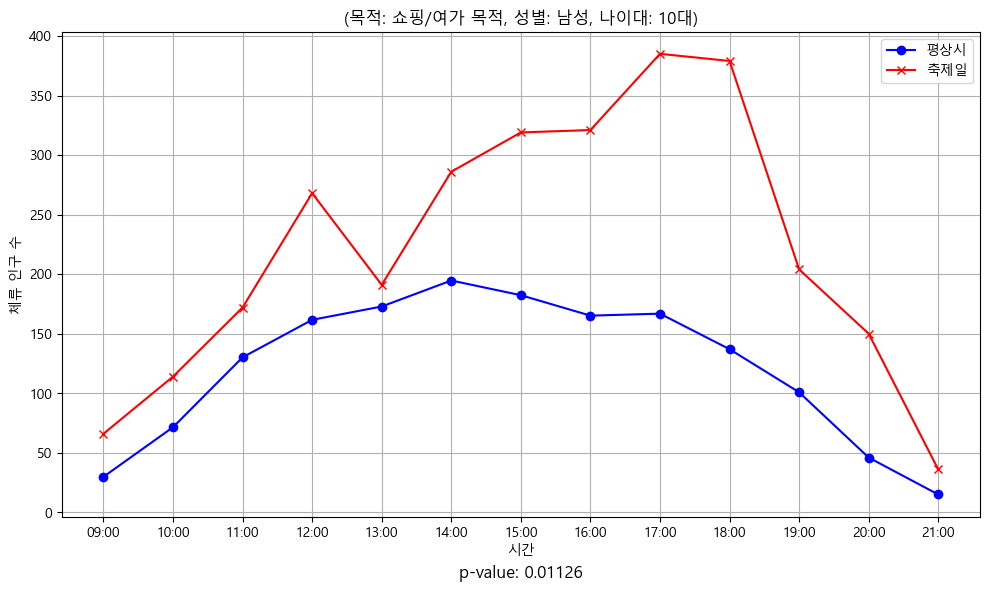

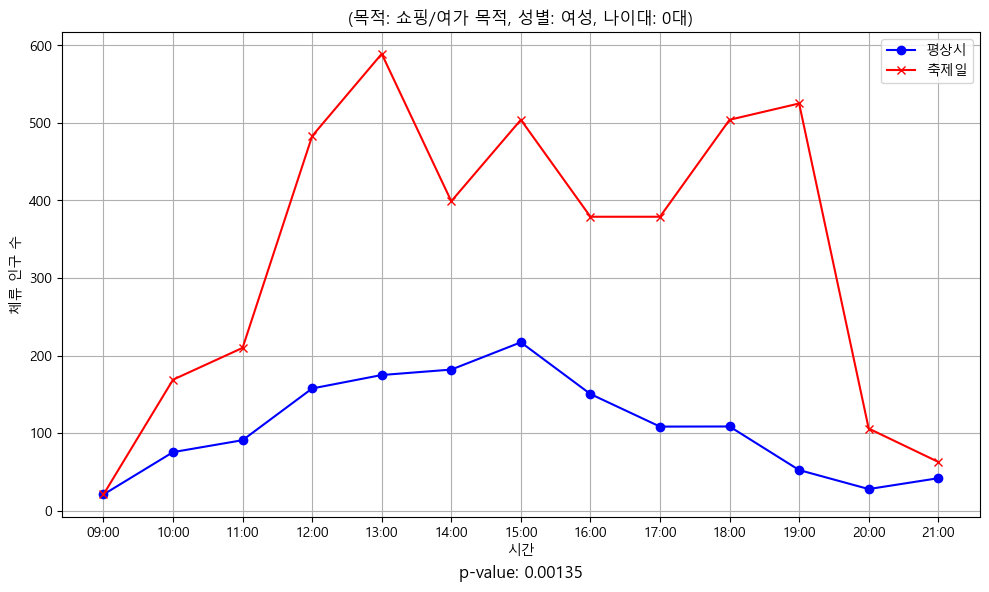

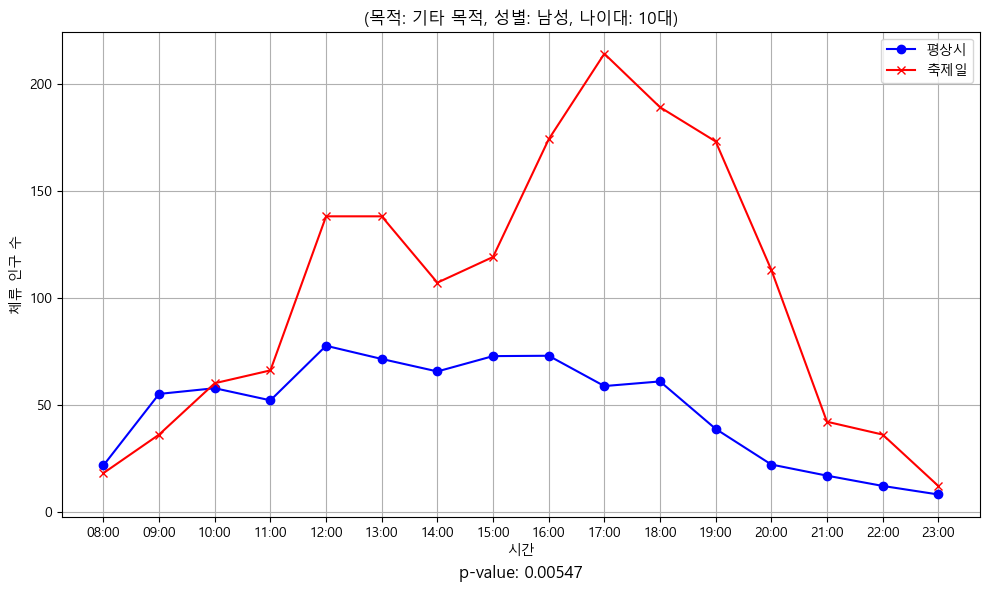

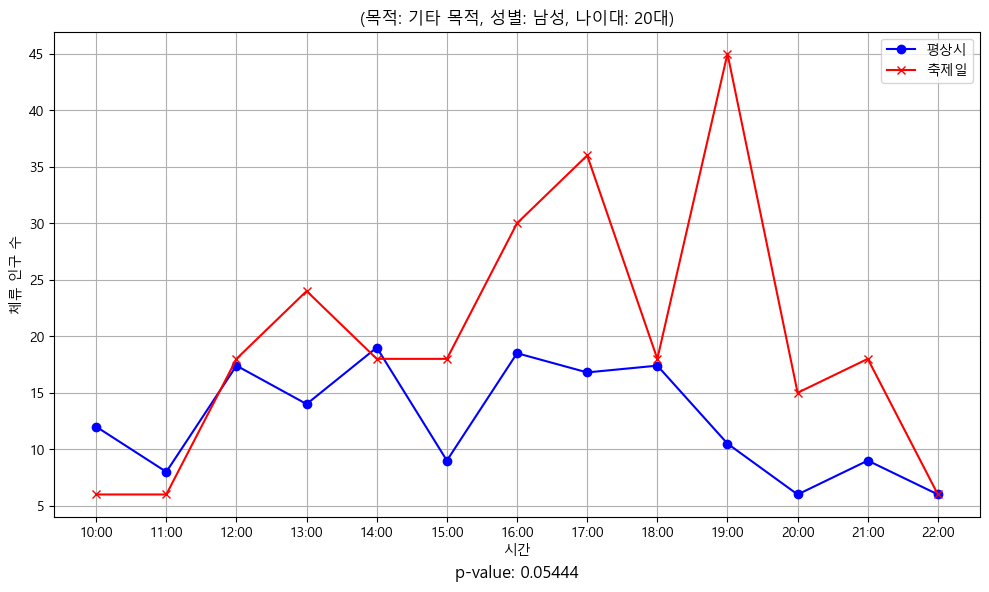

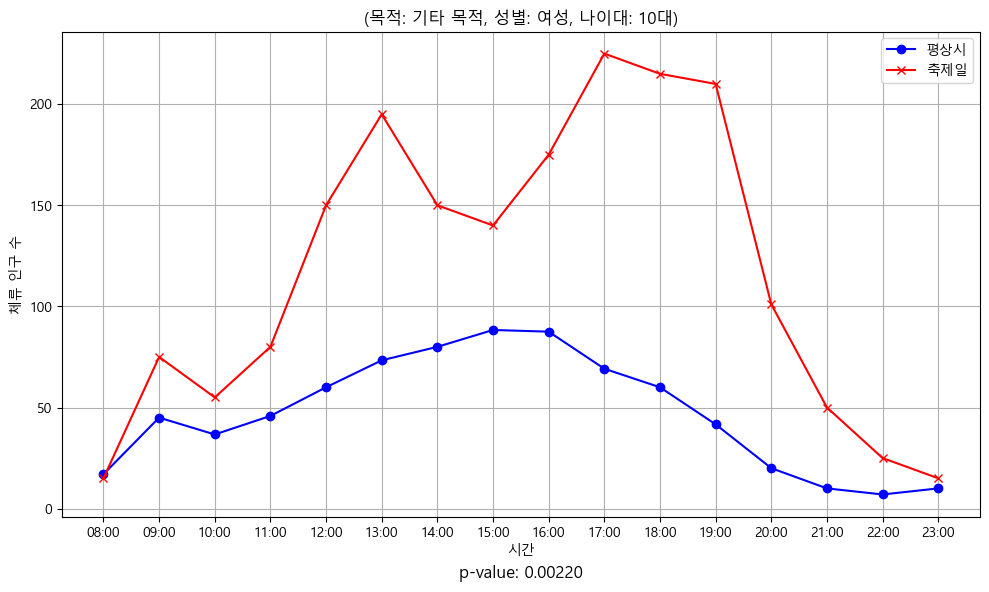

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from scipy import stats
import numpy as np

# 한글 폰트 설정 (malgun 폰트 사용 예시)
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = fm.FontProperties(fname=font_path)
plt.rc('font', family=font_prop.get_name())

# 평상시 데이터 파일 불러오기
df_normal_1 = pd.read_csv(r"csv\od_20230903_1.csv")
df_normal_2 = pd.read_csv(r"csv\od_20230910_1.csv")
df_normal_3 = pd.read_csv(r"csv\od_20230917_1.csv")
df_normal_4 = pd.read_csv(r"csv\od_20230924_1.csv")
df_normal_5 = pd.read_csv(r"csv\od_20231001_1.csv")
df_normal_6 = pd.read_csv(r"csv\od_20231015_1.csv")

# 축제 데이터 파일 불러오기
df_festival = pd.read_csv(r"csv\od_20231008_1.csv")

# 도착지 행정동 코드
dest_hdong_cd_list = [4111574000]

# 분석할 목적 (3: 쇼핑/여가, 4: 기타, 5: 여행)
purposes = [3, 4, 5]

# 성별과 나이대 정의
genders = [0, 1]  # 0: 남성, 1: 여성
ages = list(range(9))  # 0: 9세 이하, 1: 10대, ..., 8: 80세 이상

# 목적별 명칭 정의
purpose_names = {
    3: "쇼핑/여가 목적",
    4: "기타 목적",
    5: "여행 목적"
}

# 각 목적별로 데이터를 필터링하고 성별과 나이대별 분석 수행
results = {}
festival_results = {}

for purpose in purposes:
    results[purpose] = {}
    festival_results[purpose] = {}
    
    for gender in genders:
        for age in ages:
            # 평상시 데이터 필터링
            filtered_data_1 = df_normal_1[(df_normal_1['dest_hdong_cd'].isin(dest_hdong_cd_list)) & 
                                          (df_normal_1['dest_purpose'] == purpose) & 
                                          (df_normal_1['gender'] == gender) & 
                                          (df_normal_1['age'] == age)]
            filtered_data_2 = df_normal_2[(df_normal_2['dest_hdong_cd'].isin(dest_hdong_cd_list)) & 
                                          (df_normal_2['dest_purpose'] == purpose) & 
                                          (df_normal_2['gender'] == gender) & 
                                          (df_normal_2['age'] == age)]
            filtered_data_3 = df_normal_3[(df_normal_3['dest_hdong_cd'].isin(dest_hdong_cd_list)) & 
                                          (df_normal_3['dest_purpose'] == purpose) & 
                                          (df_normal_3['gender'] == gender) & 
                                          (df_normal_3['age'] == age)]
            filtered_data_4 = df_normal_4[(df_normal_4['dest_hdong_cd'].isin(dest_hdong_cd_list)) & 
                                          (df_normal_4['dest_purpose'] == purpose) & 
                                          (df_normal_4['gender'] == gender) & 
                                          (df_normal_4['age'] == age)]
            filtered_data_5 = df_normal_5[(df_normal_5['dest_hdong_cd'].isin(dest_hdong_cd_list)) & 
                                          (df_normal_5['dest_purpose'] == purpose) & 
                                          (df_normal_5['gender'] == gender) & 
                                          (df_normal_5['age'] == age)]
            filtered_data_6 = df_normal_6[(df_normal_6['dest_hdong_cd'].isin(dest_hdong_cd_list)) & 
                                          (df_normal_6['dest_purpose'] == purpose) & 
                                          (df_normal_6['gender'] == gender) & 
                                          (df_normal_6['age'] == age)]
            
            # 축제일 데이터 필터링
            filtered_data_0 = df_festival[(df_festival['dest_hdong_cd'].isin(dest_hdong_cd_list)) & 
                                          (df_festival['dest_purpose'] == purpose) & 
                                          (df_festival['gender'] == gender) & 
                                          (df_festival['age'] == age)]
            f_0_sum = filtered_data_0.groupby('end_time')['od_cnts'].sum()

            # 평상시 각 날짜의 합계
            f_1_sum = filtered_data_1.groupby('end_time')['od_cnts'].sum()
            f_2_sum = filtered_data_2.groupby('end_time')['od_cnts'].sum()
            f_3_sum = filtered_data_3.groupby('end_time')['od_cnts'].sum()
            f_4_sum = filtered_data_4.groupby('end_time')['od_cnts'].sum()
            f_5_sum = filtered_data_5.groupby('end_time')['od_cnts'].sum()
            f_6_sum = filtered_data_6.groupby('end_time')['od_cnts'].sum()

            # 평상시 평균 계산
            f_sum = [f_1_sum, f_2_sum, f_3_sum, f_4_sum, f_5_sum, f_6_sum]
            avg_df = pd.concat(f_sum).groupby('end_time').mean()

            # 결과 저장
            if not avg_df.empty and not f_0_sum.empty:
                results[purpose][(gender, age)] = avg_df
                festival_results[purpose][(gender, age)] = f_0_sum

# t-test 결과 저장할 딕셔너리
ttest_results = {}

# 동적으로 subplot을 생성하고, 데이터가 있는 경우에만 그래프 그리기
for purpose in purposes:
    ttest_results[purpose] = {}
    
    for gender in genders:
        for age in ages:
            avg_df = results[purpose].get((gender, age))
            f_0_sum = festival_results[purpose].get((gender, age))

            # T-test 전에 데이터 길이 및 값 체크 (데이터 부족 및 동일 값 문제 방지)
            if avg_df is not None and f_0_sum is not None and len(avg_df) > 1 and len(f_0_sum) > 1:
                # 인덱스가 같은지 확인 후 비교
                if avg_df.index.equals(f_0_sum.index):
                    # 두 데이터셋이 거의 동일한지 확인하여 T-test 실행 여부 결정
                    if not np.allclose(avg_df.values, f_0_sum.values):
                        # 새로운 subplot을 생성 (데이터가 있는 경우에만 생성)
                        fig, ax = plt.subplots(figsize=(10, 6))

                        # 평상시 데이터 (파란색) 그래프 생성
                        ax.plot(avg_df.index, avg_df.values, marker='o', 
                                            label='평상시', color='blue')

                        # 축제 인구 데이터 (빨간색) 그래프 생성
                        ax.plot(f_0_sum.index, f_0_sum.values, marker='x', 
                                            label='축제일', color='red')

                        # t-test 수행
                        ttest_result = stats.ttest_ind(avg_df.values, f_0_sum.values, equal_var=False)

                        # t-test 결과 저장
                        ttest_results[purpose][(gender, age)] = ttest_result

                        # 각 서브플롯에 제목 및 라벨 추가
                        title = f'(목적: {purpose_names[purpose]}, 성별: {"남성" if gender == 0 else "여성"}, 나이대: {age*10}대)'
                        ax.set_title(title, fontsize=12)
                        ax.set_xlabel('시간', fontsize=10)
                        ax.set_ylabel('체류 인구 수', fontsize=10)
                        ax.grid(True)
                        ax.legend()

                        # T-test 결과 (p-value)를 그래프 아래에 추가
                        p_value = ttest_result.pvalue
                        ax.text(0.5, -0.1, f'p-value: {p_value:.5f}', 
                                transform=ax.transAxes, 
                                fontsize=12, va='top', ha='center')

                        # 그래프 표시
                        plt.tight_layout()
                        plt.show()

# 결과가 없는 경우는 그래프 생성하지 않음


## 1009 (월)

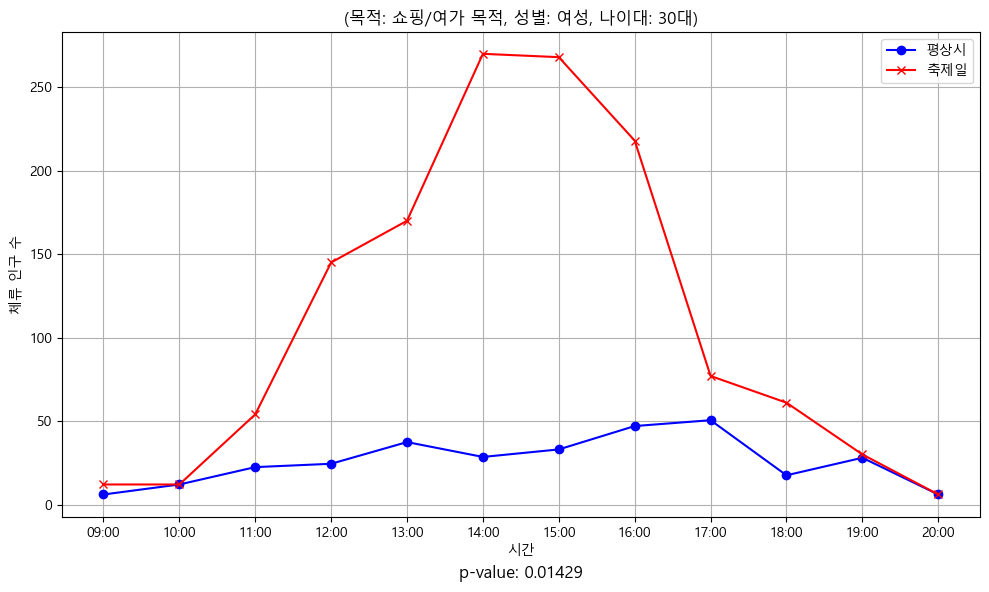

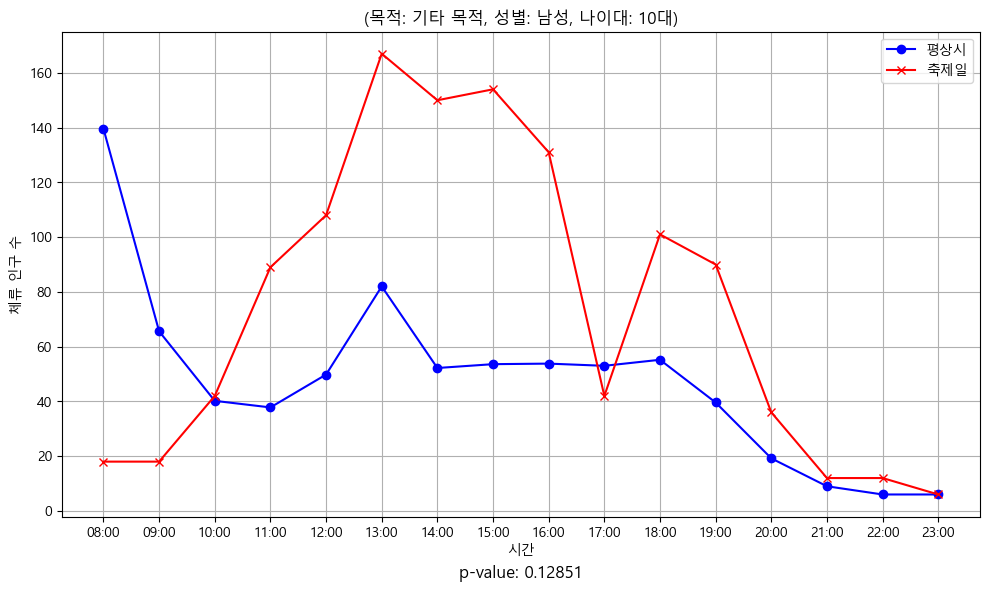

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from scipy import stats
import numpy as np

# 한글 폰트 설정 (malgun 폰트 사용 예시)
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = fm.FontProperties(fname=font_path)
plt.rc('font', family=font_prop.get_name())

# 평상시 데이터 파일 불러오기
df_normal_1 = pd.read_csv(r"csv\od_20230904_1.csv")
df_normal_2 = pd.read_csv(r"csv\od_20230911_1.csv")
df_normal_3 = pd.read_csv(r"csv\od_20230918_1.csv")
df_normal_4 = pd.read_csv(r"csv\od_20230925_1.csv")
df_normal_5 = pd.read_csv(r"csv\od_20231002_1.csv")

# 축제 데이터 파일 불러오기
df_festival = pd.read_csv(r"csv\od_20231009_1.csv")

# 도착지 행정동 코드
dest_hdong_cd_list = [4111574000]

# 분석할 목적 (3: 쇼핑/여가, 4: 기타, 5: 여행)
purposes = [3, 4, 5]

# 성별과 나이대 정의
genders = [0, 1]  # 0: 남성, 1: 여성
ages = list(range(9))  # 0: 9세 이하, 1: 10대, ..., 8: 80세 이상

# 목적별 명칭 정의
purpose_names = {
    3: "쇼핑/여가 목적",
    4: "기타 목적",
    5: "여행 목적"
}

# 각 목적별로 데이터를 필터링하고 성별과 나이대별 분석 수행
results = {}
festival_results = {}

for purpose in purposes:
    results[purpose] = {}
    festival_results[purpose] = {}
    
    for gender in genders:
        for age in ages:
            # 평상시 데이터 필터링
            filtered_data_1 = df_normal_1[(df_normal_1['dest_hdong_cd'].isin(dest_hdong_cd_list)) & 
                                          (df_normal_1['dest_purpose'] == purpose) & 
                                          (df_normal_1['gender'] == gender) & 
                                          (df_normal_1['age'] == age)]
            filtered_data_2 = df_normal_2[(df_normal_2['dest_hdong_cd'].isin(dest_hdong_cd_list)) & 
                                          (df_normal_2['dest_purpose'] == purpose) & 
                                          (df_normal_2['gender'] == gender) & 
                                          (df_normal_2['age'] == age)]
            filtered_data_3 = df_normal_3[(df_normal_3['dest_hdong_cd'].isin(dest_hdong_cd_list)) & 
                                          (df_normal_3['dest_purpose'] == purpose) & 
                                          (df_normal_3['gender'] == gender) & 
                                          (df_normal_3['age'] == age)]
            filtered_data_4 = df_normal_4[(df_normal_4['dest_hdong_cd'].isin(dest_hdong_cd_list)) & 
                                          (df_normal_4['dest_purpose'] == purpose) & 
                                          (df_normal_4['gender'] == gender) & 
                                          (df_normal_4['age'] == age)]
            filtered_data_5 = df_normal_5[(df_normal_5['dest_hdong_cd'].isin(dest_hdong_cd_list)) & 
                                          (df_normal_5['dest_purpose'] == purpose) & 
                                          (df_normal_5['gender'] == gender) & 
                                          (df_normal_5['age'] == age)]
            
            # 축제일 데이터 필터링
            filtered_data_0 = df_festival[(df_festival['dest_hdong_cd'].isin(dest_hdong_cd_list)) & 
                                          (df_festival['dest_purpose'] == purpose) & 
                                          (df_festival['gender'] == gender) & 
                                          (df_festival['age'] == age)]
            f_0_sum = filtered_data_0.groupby('end_time')['od_cnts'].sum()

            # 평상시 각 날짜의 합계
            f_1_sum = filtered_data_1.groupby('end_time')['od_cnts'].sum()
            f_2_sum = filtered_data_2.groupby('end_time')['od_cnts'].sum()
            f_3_sum = filtered_data_3.groupby('end_time')['od_cnts'].sum()
            f_4_sum = filtered_data_4.groupby('end_time')['od_cnts'].sum()
            f_5_sum = filtered_data_5.groupby('end_time')['od_cnts'].sum()

            # 평상시 평균 계산
            f_sum = [f_1_sum, f_2_sum, f_3_sum, f_4_sum, f_5_sum]
            avg_df = pd.concat(f_sum).groupby('end_time').mean()

            # 결과 저장
            if not avg_df.empty and not f_0_sum.empty:
                results[purpose][(gender, age)] = avg_df
                festival_results[purpose][(gender, age)] = f_0_sum

# t-test 결과 저장할 딕셔너리
ttest_results = {}

# 동적으로 subplot을 생성하고, 데이터가 있는 경우에만 그래프 그리기
for purpose in purposes:
    ttest_results[purpose] = {}
    
    for gender in genders:
        for age in ages:
            avg_df = results[purpose].get((gender, age))
            f_0_sum = festival_results[purpose].get((gender, age))

            # T-test 전에 데이터 길이 및 값 체크 (데이터 부족 및 동일 값 문제 방지)
            if avg_df is not None and f_0_sum is not None and len(avg_df) > 1 and len(f_0_sum) > 1:
                # 인덱스가 같은지 확인 후 비교
                if avg_df.index.equals(f_0_sum.index):
                    # 두 데이터셋이 거의 동일한지 확인하여 T-test 실행 여부 결정
                    if not np.allclose(avg_df.values, f_0_sum.values):
                        # 새로운 subplot을 생성 (데이터가 있는 경우에만 생성)
                        fig, ax = plt.subplots(figsize=(10, 6))

                        # 평상시 데이터 (파란색) 그래프 생성
                        ax.plot(avg_df.index, avg_df.values, marker='o', 
                                            label='평상시', color='blue')

                        # 축제 인구 데이터 (빨간색) 그래프 생성
                        ax.plot(f_0_sum.index, f_0_sum.values, marker='x', 
                                            label='축제일', color='red')

                        # t-test 수행
                        ttest_result = stats.ttest_ind(avg_df.values, f_0_sum.values, equal_var=False)

                        # t-test 결과 저장
                        ttest_results[purpose][(gender, age)] = ttest_result

                        # 각 서브플롯에 제목 및 라벨 추가
                        title = f'(목적: {purpose_names[purpose]}, 성별: {"남성" if gender == 0 else "여성"}, 나이대: {age*10}대)'
                        ax.set_title(title, fontsize=12)
                        ax.set_xlabel('시간', fontsize=10)
                        ax.set_ylabel('체류 인구 수', fontsize=10)
                        ax.grid(True)
                        ax.legend()

                        # T-test 결과 (p-value)를 그래프 아래에 추가
                        p_value = ttest_result.pvalue
                        ax.text(0.5, -0.1, f'p-value: {p_value:.5f}', 
                                transform=ax.transAxes, 
                                fontsize=12, va='top', ha='center')

                        # 그래프 표시
                        plt.tight_layout()
                        plt.show()

# 결과가 없는 경우는 그래프 생성하지 않음


# 구리 코스모스 한강예술제 (23.10.13~23.10.15)

## 1015 (일)

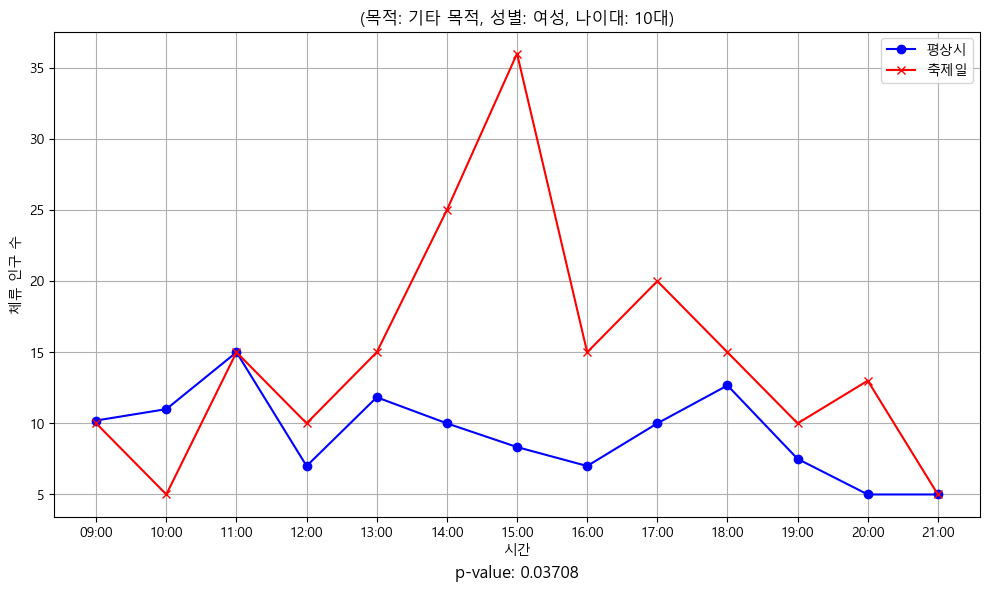

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from scipy import stats
import numpy as np

# 한글 폰트 설정 (malgun 폰트 사용 예시)
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = fm.FontProperties(fname=font_path)
plt.rc('font', family=font_prop.get_name())

# 평상시 데이터 파일 불러오기
df_normal_1 = pd.read_csv(r"csv\od_20230903_1.csv")
df_normal_2 = pd.read_csv(r"csv\od_20230910_1.csv")
df_normal_3 = pd.read_csv(r"csv\od_20230917_1.csv")
df_normal_4 = pd.read_csv(r"csv\od_20230924_1.csv")
df_normal_5 = pd.read_csv(r"csv\od_20231001_1.csv")
df_normal_6 = pd.read_csv(r"csv\od_20231008_1.csv")

# 축제 데이터 파일 불러오기
df_festival = pd.read_csv(r"csv\od_20231015_1.csv")

# 도착지 행정동 코드
dest_hdong_cd_list = [4131059000]

# 분석할 목적 (3: 쇼핑/여가, 4: 기타, 5: 여행)
purposes = [3, 4, 5]

# 성별과 나이대 정의
genders = [0, 1]  # 0: 남성, 1: 여성
ages = list(range(9))  # 0: 9세 이하, 1: 10대, ..., 8: 80세 이상

# 목적별 명칭 정의
purpose_names = {
    3: "쇼핑/여가 목적",
    4: "기타 목적",
    5: "여행 목적"
}

# 각 목적별로 데이터를 필터링하고 성별과 나이대별 분석 수행
results = {}
festival_results = {}

for purpose in purposes:
    results[purpose] = {}
    festival_results[purpose] = {}
    
    for gender in genders:
        for age in ages:
            # 평상시 데이터 필터링
            filtered_data_1 = df_normal_1[(df_normal_1['dest_hdong_cd'].isin(dest_hdong_cd_list)) & 
                                          (df_normal_1['dest_purpose'] == purpose) & 
                                          (df_normal_1['gender'] == gender) & 
                                          (df_normal_1['age'] == age)]
            filtered_data_2 = df_normal_2[(df_normal_2['dest_hdong_cd'].isin(dest_hdong_cd_list)) & 
                                          (df_normal_2['dest_purpose'] == purpose) & 
                                          (df_normal_2['gender'] == gender) & 
                                          (df_normal_2['age'] == age)]
            filtered_data_3 = df_normal_3[(df_normal_3['dest_hdong_cd'].isin(dest_hdong_cd_list)) & 
                                          (df_normal_3['dest_purpose'] == purpose) & 
                                          (df_normal_3['gender'] == gender) & 
                                          (df_normal_3['age'] == age)]
            filtered_data_4 = df_normal_4[(df_normal_4['dest_hdong_cd'].isin(dest_hdong_cd_list)) & 
                                          (df_normal_4['dest_purpose'] == purpose) & 
                                          (df_normal_4['gender'] == gender) & 
                                          (df_normal_4['age'] == age)]
            filtered_data_5 = df_normal_5[(df_normal_5['dest_hdong_cd'].isin(dest_hdong_cd_list)) & 
                                          (df_normal_5['dest_purpose'] == purpose) & 
                                          (df_normal_5['gender'] == gender) & 
                                          (df_normal_5['age'] == age)]
            filtered_data_6 = df_normal_6[(df_normal_6['dest_hdong_cd'].isin(dest_hdong_cd_list)) & 
                                          (df_normal_6['dest_purpose'] == purpose) & 
                                          (df_normal_6['gender'] == gender) & 
                                          (df_normal_6['age'] == age)]
            
            # 축제일 데이터 필터링
            filtered_data_0 = df_festival[(df_festival['dest_hdong_cd'].isin(dest_hdong_cd_list)) & 
                                          (df_festival['dest_purpose'] == purpose) & 
                                          (df_festival['gender'] == gender) & 
                                          (df_festival['age'] == age)]
            f_0_sum = filtered_data_0.groupby('end_time')['od_cnts'].sum()

            # 평상시 각 날짜의 합계
            f_1_sum = filtered_data_1.groupby('end_time')['od_cnts'].sum()
            f_2_sum = filtered_data_2.groupby('end_time')['od_cnts'].sum()
            f_3_sum = filtered_data_3.groupby('end_time')['od_cnts'].sum()
            f_4_sum = filtered_data_4.groupby('end_time')['od_cnts'].sum()
            f_5_sum = filtered_data_5.groupby('end_time')['od_cnts'].sum()
            f_6_sum = filtered_data_6.groupby('end_time')['od_cnts'].sum()

            # 평상시 평균 계산
            f_sum = [f_1_sum, f_2_sum, f_3_sum, f_4_sum, f_5_sum, f_6_sum]
            avg_df = pd.concat(f_sum).groupby('end_time').mean()

            # 결과 저장
            if not avg_df.empty and not f_0_sum.empty:
                results[purpose][(gender, age)] = avg_df
                festival_results[purpose][(gender, age)] = f_0_sum

# t-test 결과 저장할 딕셔너리
ttest_results = {}

# 동적으로 subplot을 생성하고, 데이터가 있는 경우에만 그래프 그리기
for purpose in purposes:
    ttest_results[purpose] = {}
    
    for gender in genders:
        for age in ages:
            avg_df = results[purpose].get((gender, age))
            f_0_sum = festival_results[purpose].get((gender, age))

            # T-test 전에 데이터 길이 및 값 체크 (데이터 부족 및 동일 값 문제 방지)
            if avg_df is not None and f_0_sum is not None and len(avg_df) > 1 and len(f_0_sum) > 1:
                # 인덱스가 같은지 확인 후 비교
                if avg_df.index.equals(f_0_sum.index):
                    # 두 데이터셋이 거의 동일한지 확인하여 T-test 실행 여부 결정
                    if not np.allclose(avg_df.values, f_0_sum.values):
                        # 새로운 subplot을 생성 (데이터가 있는 경우에만 생성)
                        fig, ax = plt.subplots(figsize=(10, 6))

                        # 평상시 데이터 (파란색) 그래프 생성
                        ax.plot(avg_df.index, avg_df.values, marker='o', 
                                            label='평상시', color='blue')

                        # 축제 인구 데이터 (빨간색) 그래프 생성
                        ax.plot(f_0_sum.index, f_0_sum.values, marker='x', 
                                            label='축제일', color='red')

                        # t-test 수행
                        ttest_result = stats.ttest_ind(avg_df.values, f_0_sum.values, equal_var=False)

                        # t-test 결과 저장
                        ttest_results[purpose][(gender, age)] = ttest_result

                        # 각 서브플롯에 제목 및 라벨 추가
                        title = f'(목적: {purpose_names[purpose]}, 성별: {"남성" if gender == 0 else "여성"}, 나이대: {age*10}대)'
                        ax.set_title(title, fontsize=12)
                        ax.set_xlabel('시간', fontsize=10)
                        ax.set_ylabel('체류 인구 수', fontsize=10)
                        ax.grid(True)
                        ax.legend()

                        # T-test 결과 (p-value)를 그래프 아래에 추가
                        p_value = ttest_result.pvalue
                        ax.text(0.5, -0.1, f'p-value: {p_value:.5f}', 
                                transform=ax.transAxes, 
                                fontsize=12, va='top', ha='center')

                        # 그래프 표시
                        plt.tight_layout()
                        plt.show()

# 결과가 없는 경우는 그래프 생성하지 않음


# 2023 구로 G 페스티벌 (2023.10.06~2023.10.08)

## 1006 (금)

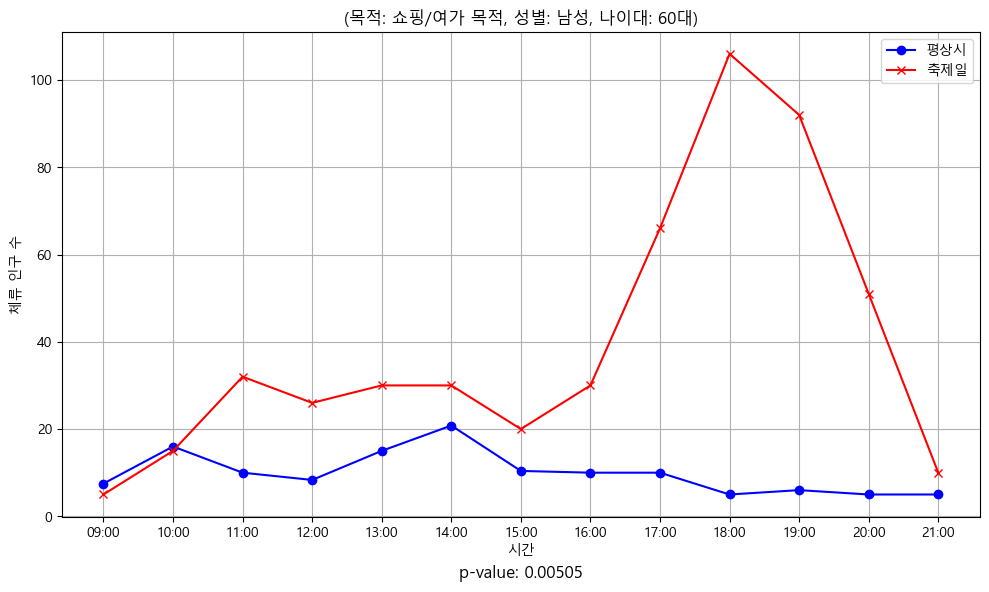

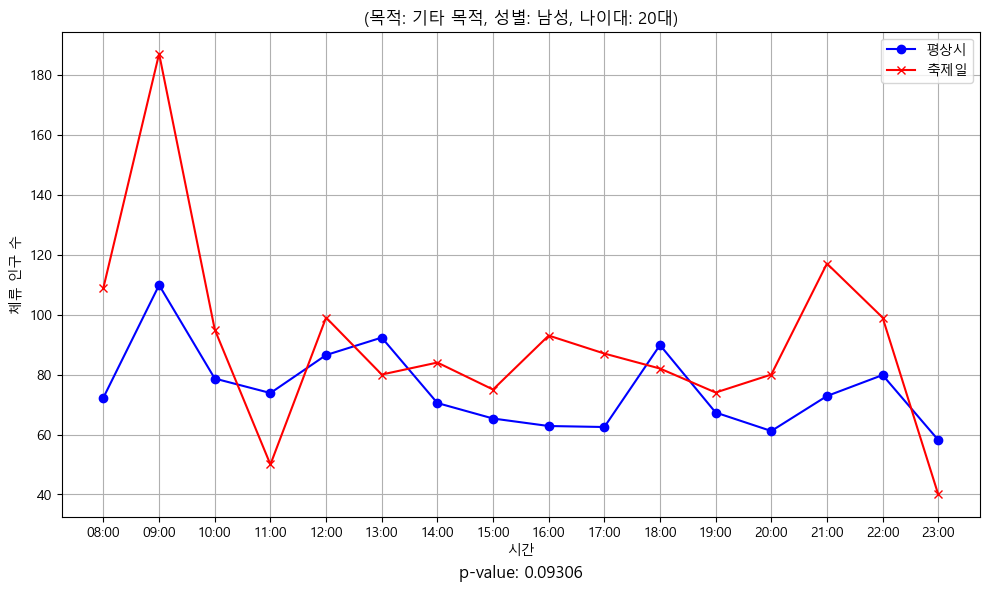

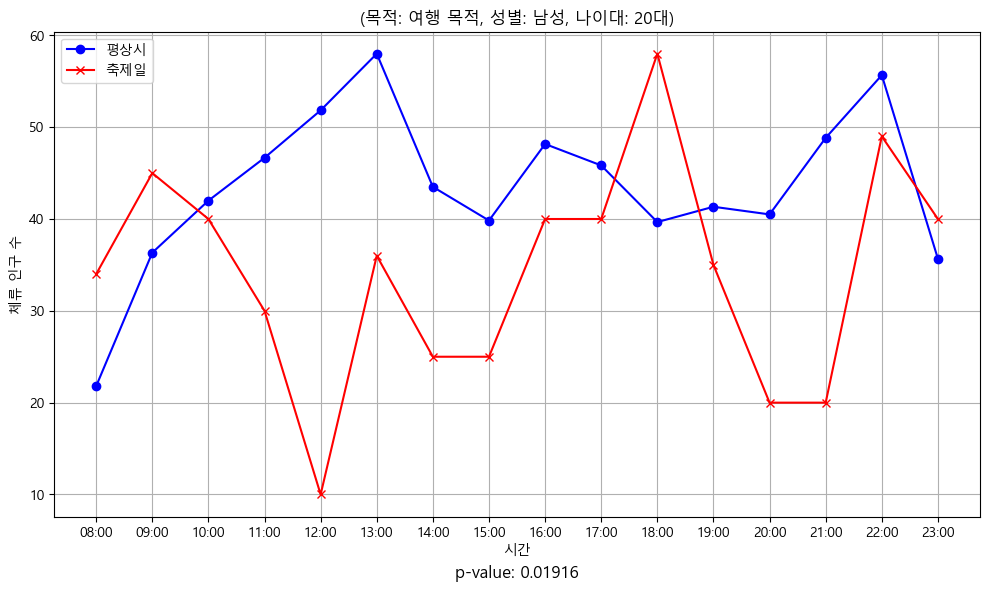

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from scipy import stats
import numpy as np

# 한글 폰트 설정 (malgun 폰트 사용 예시)
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = fm.FontProperties(fname=font_path)
plt.rc('font', family=font_prop.get_name())

# 평상시 데이터 파일 불러오기
df_normal_1 = pd.read_csv(r"csv\od_20230901_1.csv")
df_normal_2 = pd.read_csv(r"csv\od_20230908_1.csv")
df_normal_3 = pd.read_csv(r"csv\od_20230915_1.csv")
df_normal_4 = pd.read_csv(r"csv\od_20230922_1.csv")
df_normal_5 = pd.read_csv(r"csv\od_20230929_1.csv")
df_normal_6 = pd.read_csv(r"csv\od_20231003_1.csv")

# 축제 데이터 파일 불러오기
df_festival = pd.read_csv(r"csv\od_20231006_1.csv")

# 도착지 행정동 코드
dest_hdong_cd_list = [1153053000, 1153072000, 1147068000, 1147067000, 1153051000]

# 분석할 목적 (3: 쇼핑/여가, 4: 기타, 5: 여행)
purposes = [3, 4, 5]

# 성별과 나이대 정의
genders = [0, 1]  # 0: 남성, 1: 여성
ages = list(range(9))  # 0: 9세 이하, 1: 10대, ..., 8: 80세 이상

# 목적별 명칭 정의
purpose_names = {
    3: "쇼핑/여가 목적",
    4: "기타 목적",
    5: "여행 목적"
}

# 각 목적별로 데이터를 필터링하고 성별과 나이대별 분석 수행
results = {}
festival_results = {}

for purpose in purposes:
    results[purpose] = {}
    festival_results[purpose] = {}
    
    for gender in genders:
        for age in ages:
            # 평상시 데이터 필터링
            filtered_data_1 = df_normal_1[(df_normal_1['dest_hdong_cd'].isin(dest_hdong_cd_list)) & 
                                          (df_normal_1['dest_purpose'] == purpose) & 
                                          (df_normal_1['gender'] == gender) & 
                                          (df_normal_1['age'] == age)]
            filtered_data_2 = df_normal_2[(df_normal_2['dest_hdong_cd'].isin(dest_hdong_cd_list)) & 
                                          (df_normal_2['dest_purpose'] == purpose) & 
                                          (df_normal_2['gender'] == gender) & 
                                          (df_normal_2['age'] == age)]
            filtered_data_3 = df_normal_3[(df_normal_3['dest_hdong_cd'].isin(dest_hdong_cd_list)) & 
                                          (df_normal_3['dest_purpose'] == purpose) & 
                                          (df_normal_3['gender'] == gender) & 
                                          (df_normal_3['age'] == age)]
            filtered_data_4 = df_normal_4[(df_normal_4['dest_hdong_cd'].isin(dest_hdong_cd_list)) & 
                                          (df_normal_4['dest_purpose'] == purpose) & 
                                          (df_normal_4['gender'] == gender) & 
                                          (df_normal_4['age'] == age)]
            filtered_data_5 = df_normal_5[(df_normal_5['dest_hdong_cd'].isin(dest_hdong_cd_list)) & 
                                          (df_normal_5['dest_purpose'] == purpose) & 
                                          (df_normal_5['gender'] == gender) & 
                                          (df_normal_5['age'] == age)]
            filtered_data_6 = df_normal_6[(df_normal_6['dest_hdong_cd'].isin(dest_hdong_cd_list)) & 
                                          (df_normal_6['dest_purpose'] == purpose) & 
                                          (df_normal_6['gender'] == gender) & 
                                          (df_normal_6['age'] == age)]
            
            # 축제일 데이터 필터링
            filtered_data_0 = df_festival[(df_festival['dest_hdong_cd'].isin(dest_hdong_cd_list)) & 
                                          (df_festival['dest_purpose'] == purpose) & 
                                          (df_festival['gender'] == gender) & 
                                          (df_festival['age'] == age)]
            f_0_sum = filtered_data_0.groupby('end_time')['od_cnts'].sum()

            # 평상시 각 날짜의 합계
            f_1_sum = filtered_data_1.groupby('end_time')['od_cnts'].sum()
            f_2_sum = filtered_data_2.groupby('end_time')['od_cnts'].sum()
            f_3_sum = filtered_data_3.groupby('end_time')['od_cnts'].sum()
            f_4_sum = filtered_data_4.groupby('end_time')['od_cnts'].sum()
            f_5_sum = filtered_data_5.groupby('end_time')['od_cnts'].sum()
            f_6_sum = filtered_data_6.groupby('end_time')['od_cnts'].sum()

            # 평상시 평균 계산
            f_sum = [f_1_sum, f_2_sum, f_3_sum, f_4_sum, f_5_sum, f_6_sum]
            avg_df = pd.concat(f_sum).groupby('end_time').mean()

            # 결과 저장
            if not avg_df.empty and not f_0_sum.empty:
                results[purpose][(gender, age)] = avg_df
                festival_results[purpose][(gender, age)] = f_0_sum

# t-test 결과 저장할 딕셔너리
ttest_results = {}

# 동적으로 subplot을 생성하고, 데이터가 있는 경우에만 그래프 그리기
for purpose in purposes:
    ttest_results[purpose] = {}
    
    for gender in genders:
        for age in ages:
            avg_df = results[purpose].get((gender, age))
            f_0_sum = festival_results[purpose].get((gender, age))

            # T-test 전에 데이터 길이 및 값 체크 (데이터 부족 및 동일 값 문제 방지)
            if avg_df is not None and f_0_sum is not None and len(avg_df) > 1 and len(f_0_sum) > 1:
                # 인덱스가 같은지 확인 후 비교
                if avg_df.index.equals(f_0_sum.index):
                    # 두 데이터셋이 거의 동일한지 확인하여 T-test 실행 여부 결정
                    if not np.allclose(avg_df.values, f_0_sum.values):
                        # 새로운 subplot을 생성 (데이터가 있는 경우에만 생성)
                        fig, ax = plt.subplots(figsize=(10, 6))

                        # 평상시 데이터 (파란색) 그래프 생성
                        ax.plot(avg_df.index, avg_df.values, marker='o', 
                                            label='평상시', color='blue')

                        # 축제 인구 데이터 (빨간색) 그래프 생성
                        ax.plot(f_0_sum.index, f_0_sum.values, marker='x', 
                                            label='축제일', color='red')

                        # t-test 수행
                        ttest_result = stats.ttest_ind(avg_df.values, f_0_sum.values, equal_var=False)

                        # t-test 결과 저장
                        ttest_results[purpose][(gender, age)] = ttest_result

                        # 각 서브플롯에 제목 및 라벨 추가
                        title = f'(목적: {purpose_names[purpose]}, 성별: {"남성" if gender == 0 else "여성"}, 나이대: {age*10}대)'
                        ax.set_title(title, fontsize=12)
                        ax.set_xlabel('시간', fontsize=10)
                        ax.set_ylabel('체류 인구 수', fontsize=10)
                        ax.grid(True)
                        ax.legend()

                        # T-test 결과 (p-value)를 그래프 아래에 추가
                        p_value = ttest_result.pvalue
                        ax.text(0.5, -0.1, f'p-value: {p_value:.5f}', 
                                transform=ax.transAxes, 
                                fontsize=12, va='top', ha='center')

                        # 그래프 표시
                        plt.tight_layout()
                        plt.show()

# 결과가 없는 경우는 그래프 생성하지 않음


## 1007 (토)

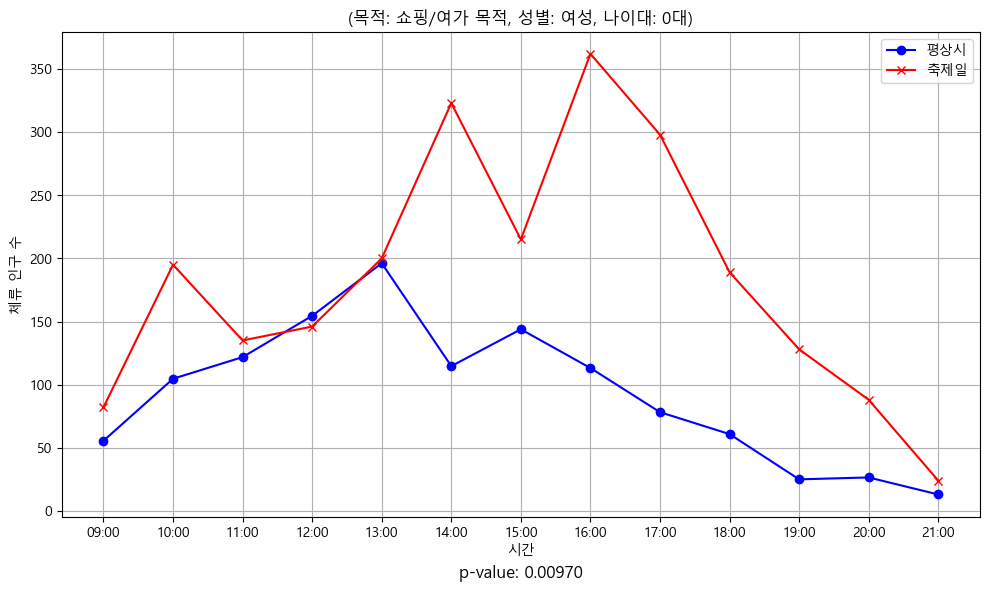

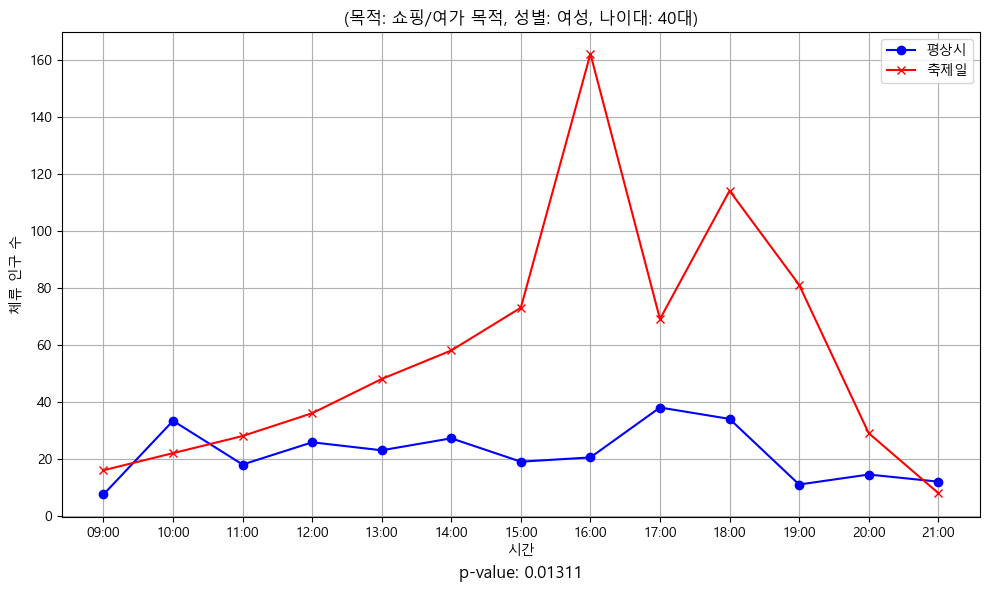

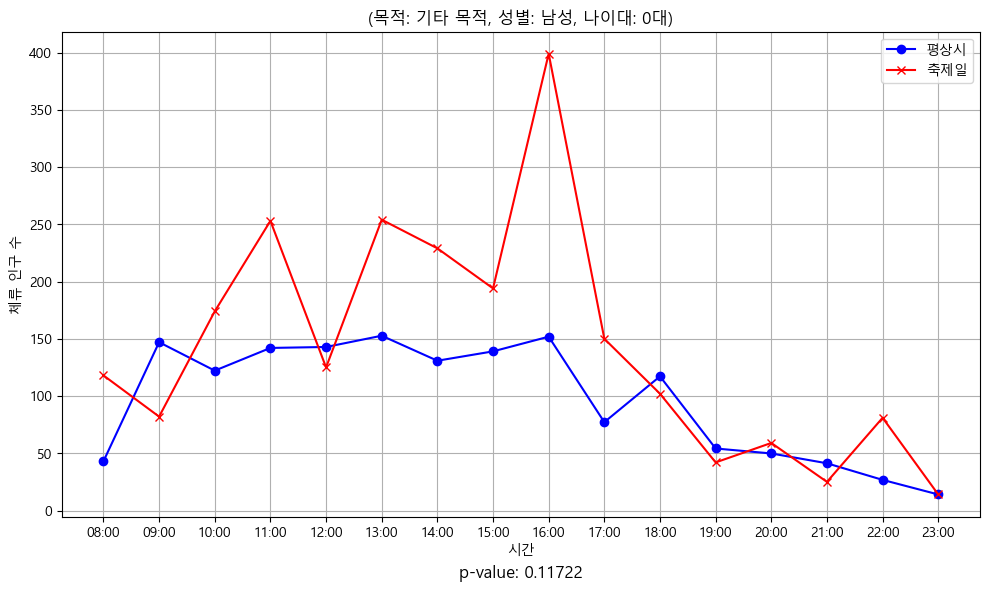

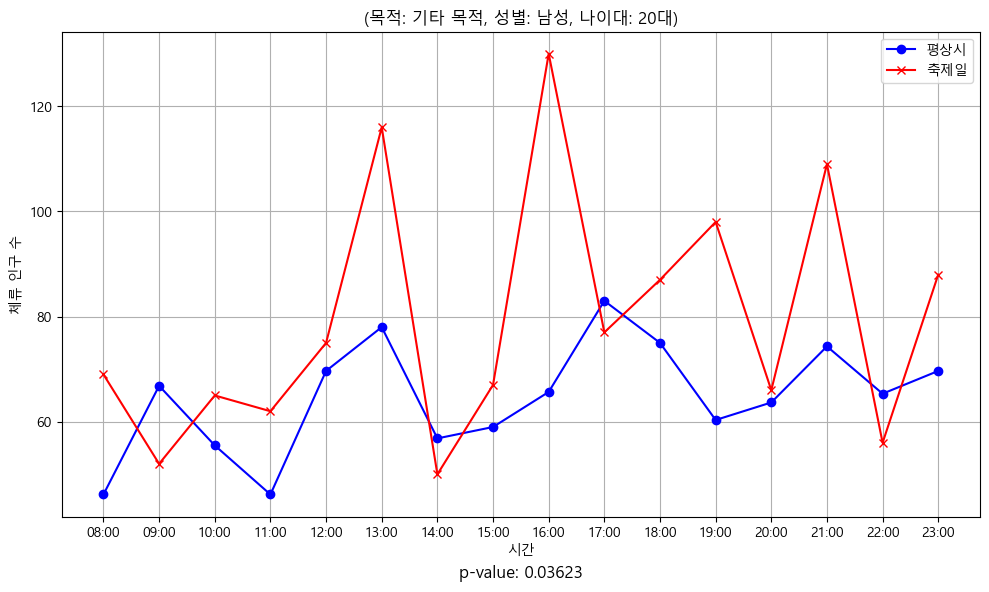

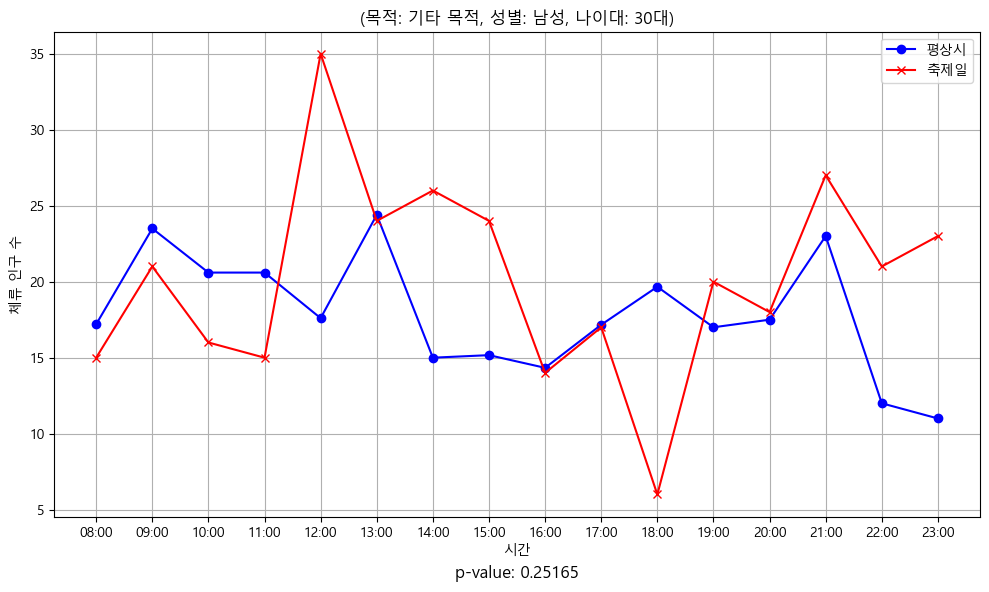

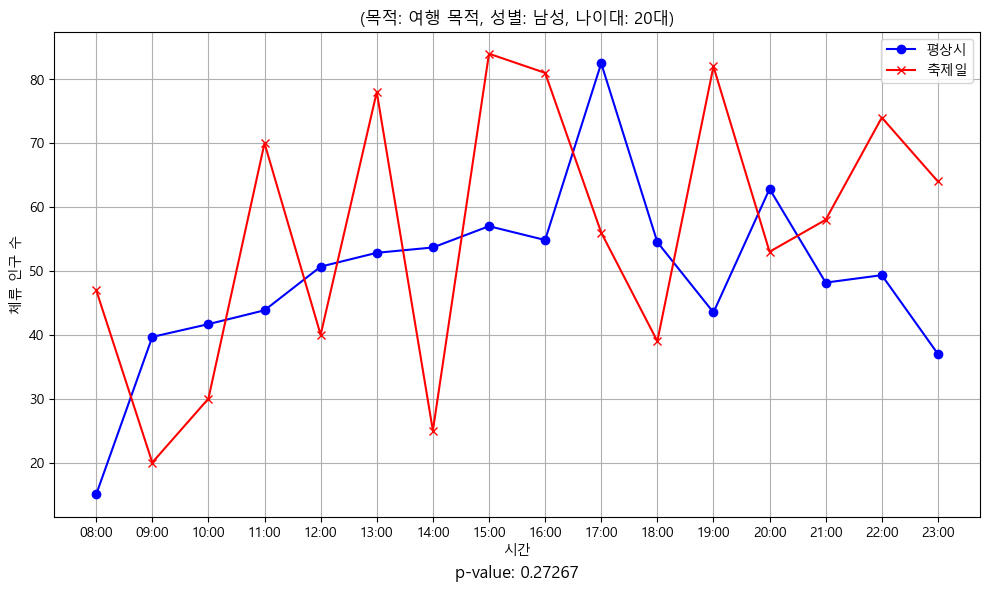

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from scipy import stats
import numpy as np

# 한글 폰트 설정 (malgun 폰트 사용 예시)
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = fm.FontProperties(fname=font_path)
plt.rc('font', family=font_prop.get_name())

# 평상시 데이터 파일 불러오기
df_normal_1 = pd.read_csv(r"csv\od_20230902_1.csv")
df_normal_2 = pd.read_csv(r"csv\od_20230909_1.csv")
df_normal_3 = pd.read_csv(r"csv\od_20230916_1.csv")
df_normal_4 = pd.read_csv(r"csv\od_20230923_1.csv")
df_normal_5 = pd.read_csv(r"csv\od_20230930_1.csv")
df_normal_6 = pd.read_csv(r"csv\od_20231004_1.csv")

# 축제 데이터 파일 불러오기
df_festival = pd.read_csv(r"csv\od_20231007_1.csv")

# 도착지 행정동 코드
dest_hdong_cd_list = [1153053000, 1153072000, 1147068000, 1147067000, 1153051000]

# 분석할 목적 (3: 쇼핑/여가, 4: 기타, 5: 여행)
purposes = [3, 4, 5]

# 성별과 나이대 정의
genders = [0, 1]  # 0: 남성, 1: 여성
ages = list(range(9))  # 0: 9세 이하, 1: 10대, ..., 8: 80세 이상

# 목적별 명칭 정의
purpose_names = {
    3: "쇼핑/여가 목적",
    4: "기타 목적",
    5: "여행 목적"
}

# 각 목적별로 데이터를 필터링하고 성별과 나이대별 분석 수행
results = {}
festival_results = {}

for purpose in purposes:
    results[purpose] = {}
    festival_results[purpose] = {}
    
    for gender in genders:
        for age in ages:
            # 평상시 데이터 필터링
            filtered_data_1 = df_normal_1[(df_normal_1['dest_hdong_cd'].isin(dest_hdong_cd_list)) & 
                                          (df_normal_1['dest_purpose'] == purpose) & 
                                          (df_normal_1['gender'] == gender) & 
                                          (df_normal_1['age'] == age)]
            filtered_data_2 = df_normal_2[(df_normal_2['dest_hdong_cd'].isin(dest_hdong_cd_list)) & 
                                          (df_normal_2['dest_purpose'] == purpose) & 
                                          (df_normal_2['gender'] == gender) & 
                                          (df_normal_2['age'] == age)]
            filtered_data_3 = df_normal_3[(df_normal_3['dest_hdong_cd'].isin(dest_hdong_cd_list)) & 
                                          (df_normal_3['dest_purpose'] == purpose) & 
                                          (df_normal_3['gender'] == gender) & 
                                          (df_normal_3['age'] == age)]
            filtered_data_4 = df_normal_4[(df_normal_4['dest_hdong_cd'].isin(dest_hdong_cd_list)) & 
                                          (df_normal_4['dest_purpose'] == purpose) & 
                                          (df_normal_4['gender'] == gender) & 
                                          (df_normal_4['age'] == age)]
            filtered_data_5 = df_normal_5[(df_normal_5['dest_hdong_cd'].isin(dest_hdong_cd_list)) & 
                                          (df_normal_5['dest_purpose'] == purpose) & 
                                          (df_normal_5['gender'] == gender) & 
                                          (df_normal_5['age'] == age)]
            filtered_data_6 = df_normal_6[(df_normal_6['dest_hdong_cd'].isin(dest_hdong_cd_list)) & 
                                          (df_normal_6['dest_purpose'] == purpose) & 
                                          (df_normal_6['gender'] == gender) & 
                                          (df_normal_6['age'] == age)]
            
            # 축제일 데이터 필터링
            filtered_data_0 = df_festival[(df_festival['dest_hdong_cd'].isin(dest_hdong_cd_list)) & 
                                          (df_festival['dest_purpose'] == purpose) & 
                                          (df_festival['gender'] == gender) & 
                                          (df_festival['age'] == age)]
            f_0_sum = filtered_data_0.groupby('end_time')['od_cnts'].sum()

            # 평상시 각 날짜의 합계
            f_1_sum = filtered_data_1.groupby('end_time')['od_cnts'].sum()
            f_2_sum = filtered_data_2.groupby('end_time')['od_cnts'].sum()
            f_3_sum = filtered_data_3.groupby('end_time')['od_cnts'].sum()
            f_4_sum = filtered_data_4.groupby('end_time')['od_cnts'].sum()
            f_5_sum = filtered_data_5.groupby('end_time')['od_cnts'].sum()
            f_6_sum = filtered_data_6.groupby('end_time')['od_cnts'].sum()

            # 평상시 평균 계산
            f_sum = [f_1_sum, f_2_sum, f_3_sum, f_4_sum, f_5_sum, f_6_sum]
            avg_df = pd.concat(f_sum).groupby('end_time').mean()

            # 결과 저장
            if not avg_df.empty and not f_0_sum.empty:
                results[purpose][(gender, age)] = avg_df
                festival_results[purpose][(gender, age)] = f_0_sum

# t-test 결과 저장할 딕셔너리
ttest_results = {}

# 동적으로 subplot을 생성하고, 데이터가 있는 경우에만 그래프 그리기
for purpose in purposes:
    ttest_results[purpose] = {}
    
    for gender in genders:
        for age in ages:
            avg_df = results[purpose].get((gender, age))
            f_0_sum = festival_results[purpose].get((gender, age))

            # T-test 전에 데이터 길이 및 값 체크 (데이터 부족 및 동일 값 문제 방지)
            if avg_df is not None and f_0_sum is not None and len(avg_df) > 1 and len(f_0_sum) > 1:
                # 인덱스가 같은지 확인 후 비교
                if avg_df.index.equals(f_0_sum.index):
                    # 두 데이터셋이 거의 동일한지 확인하여 T-test 실행 여부 결정
                    if not np.allclose(avg_df.values, f_0_sum.values):
                        # 새로운 subplot을 생성 (데이터가 있는 경우에만 생성)
                        fig, ax = plt.subplots(figsize=(10, 6))

                        # 평상시 데이터 (파란색) 그래프 생성
                        ax.plot(avg_df.index, avg_df.values, marker='o', 
                                            label='평상시', color='blue')

                        # 축제 인구 데이터 (빨간색) 그래프 생성
                        ax.plot(f_0_sum.index, f_0_sum.values, marker='x', 
                                            label='축제일', color='red')

                        # t-test 수행
                        ttest_result = stats.ttest_ind(avg_df.values, f_0_sum.values, equal_var=False)

                        # t-test 결과 저장
                        ttest_results[purpose][(gender, age)] = ttest_result

                        # 각 서브플롯에 제목 및 라벨 추가
                        title = f'(목적: {purpose_names[purpose]}, 성별: {"남성" if gender == 0 else "여성"}, 나이대: {age*10}대)'
                        ax.set_title(title, fontsize=12)
                        ax.set_xlabel('시간', fontsize=10)
                        ax.set_ylabel('체류 인구 수', fontsize=10)
                        ax.grid(True)
                        ax.legend()

                        # T-test 결과 (p-value)를 그래프 아래에 추가
                        p_value = ttest_result.pvalue
                        ax.text(0.5, -0.1, f'p-value: {p_value:.5f}', 
                                transform=ax.transAxes, 
                                fontsize=12, va='top', ha='center')

                        # 그래프 표시
                        plt.tight_layout()
                        plt.show()

# 결과가 없는 경우는 그래프 생성하지 않음


## 1008 (일)

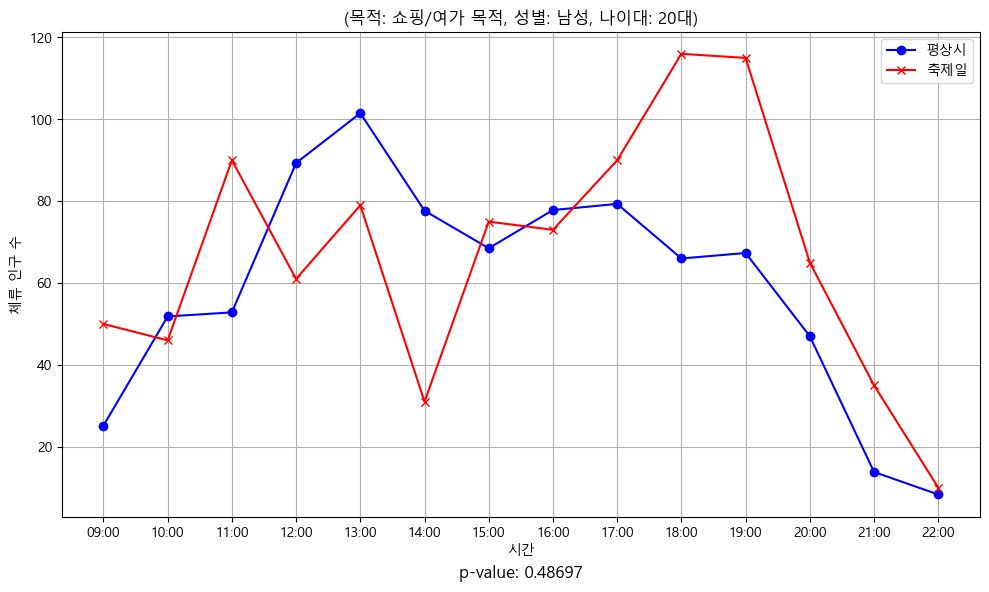

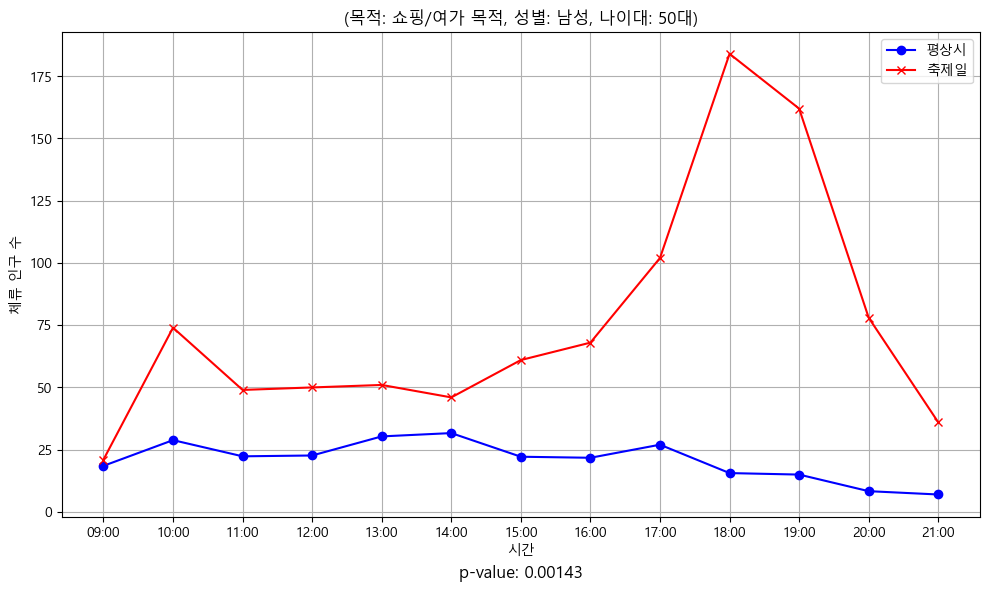

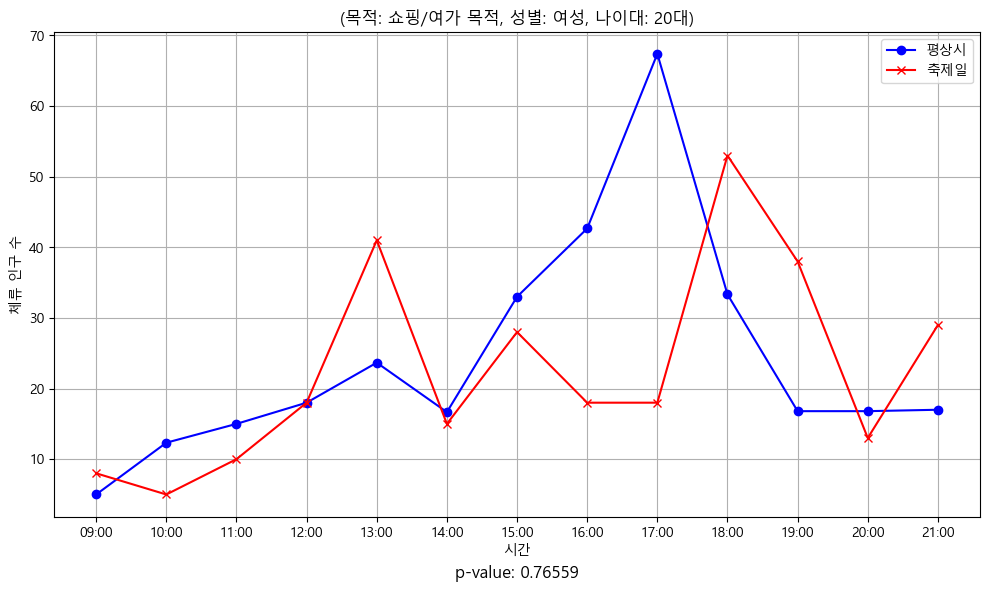

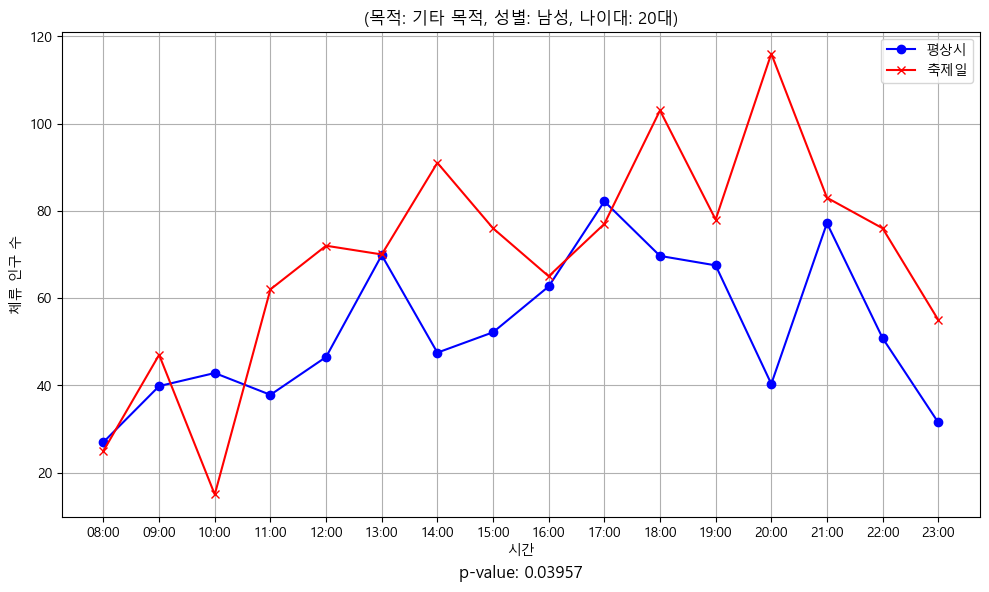

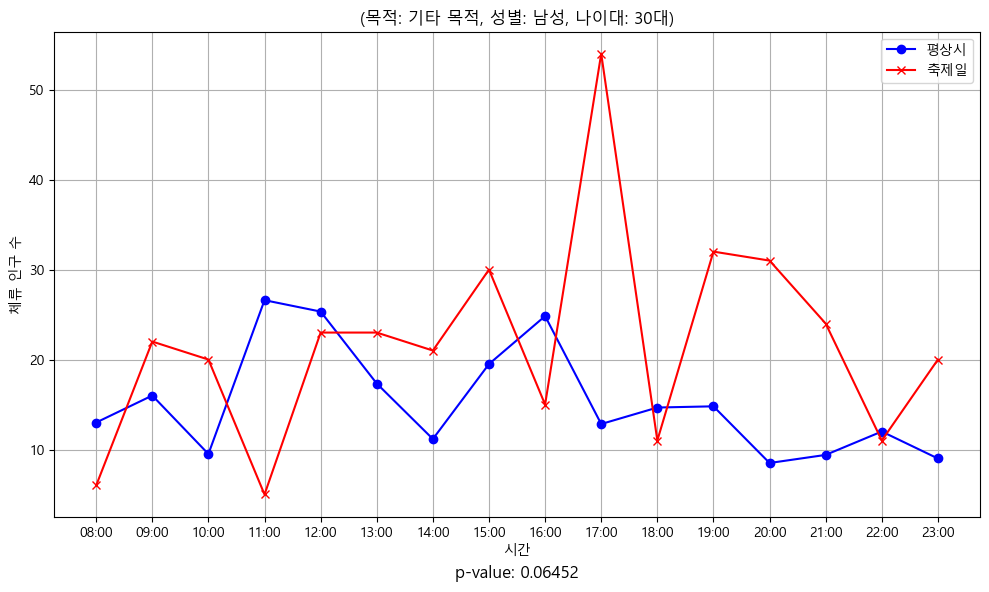

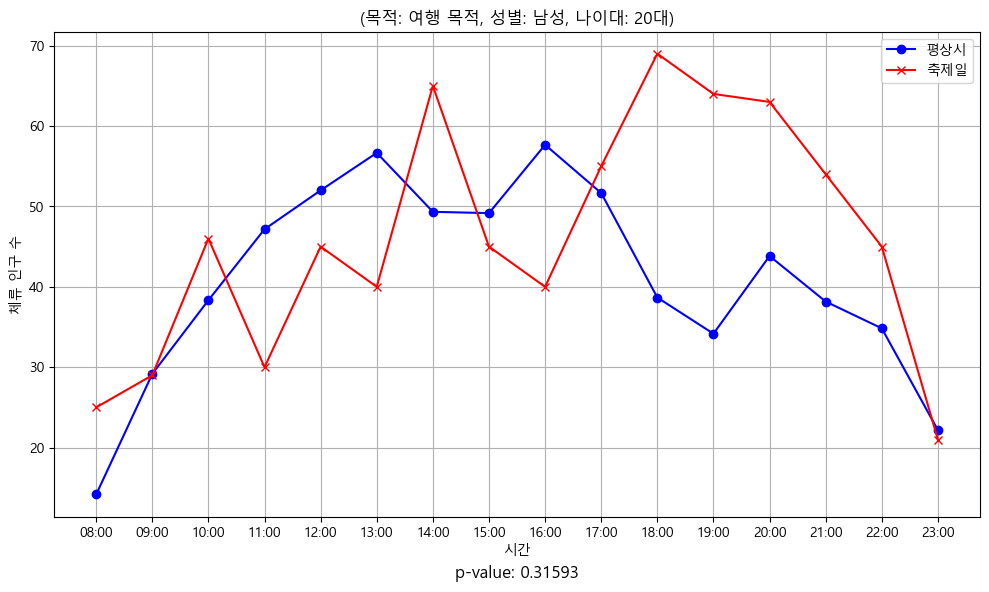

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from scipy import stats
import numpy as np

# 한글 폰트 설정 (malgun 폰트 사용 예시)
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = fm.FontProperties(fname=font_path)
plt.rc('font', family=font_prop.get_name())

# 평상시 데이터 파일 불러오기
df_normal_1 = pd.read_csv(r"csv\od_20230903_1.csv")
df_normal_2 = pd.read_csv(r"csv\od_20230910_1.csv")
df_normal_3 = pd.read_csv(r"csv\od_20230917_1.csv")
df_normal_4 = pd.read_csv(r"csv\od_20230924_1.csv")
df_normal_5 = pd.read_csv(r"csv\od_20231001_1.csv")
df_normal_6 = pd.read_csv(r"csv\od_20231015_1.csv")

# 축제 데이터 파일 불러오기
df_festival = pd.read_csv(r"csv\od_20231008_1.csv")

# 도착지 행정동 코드
dest_hdong_cd_list = [1153053000, 1153072000, 1147068000, 1147067000, 1153051000]

# 분석할 목적 (3: 쇼핑/여가, 4: 기타, 5: 여행)
purposes = [3, 4, 5]

# 성별과 나이대 정의
genders = [0, 1]  # 0: 남성, 1: 여성
ages = list(range(9))  # 0: 9세 이하, 1: 10대, ..., 8: 80세 이상

# 목적별 명칭 정의
purpose_names = {
    3: "쇼핑/여가 목적",
    4: "기타 목적",
    5: "여행 목적"
}

# 각 목적별로 데이터를 필터링하고 성별과 나이대별 분석 수행
results = {}
festival_results = {}

for purpose in purposes:
    results[purpose] = {}
    festival_results[purpose] = {}
    
    for gender in genders:
        for age in ages:
            # 평상시 데이터 필터링
            filtered_data_1 = df_normal_1[(df_normal_1['dest_hdong_cd'].isin(dest_hdong_cd_list)) & 
                                          (df_normal_1['dest_purpose'] == purpose) & 
                                          (df_normal_1['gender'] == gender) & 
                                          (df_normal_1['age'] == age)]
            filtered_data_2 = df_normal_2[(df_normal_2['dest_hdong_cd'].isin(dest_hdong_cd_list)) & 
                                          (df_normal_2['dest_purpose'] == purpose) & 
                                          (df_normal_2['gender'] == gender) & 
                                          (df_normal_2['age'] == age)]
            filtered_data_3 = df_normal_3[(df_normal_3['dest_hdong_cd'].isin(dest_hdong_cd_list)) & 
                                          (df_normal_3['dest_purpose'] == purpose) & 
                                          (df_normal_3['gender'] == gender) & 
                                          (df_normal_3['age'] == age)]
            filtered_data_4 = df_normal_4[(df_normal_4['dest_hdong_cd'].isin(dest_hdong_cd_list)) & 
                                          (df_normal_4['dest_purpose'] == purpose) & 
                                          (df_normal_4['gender'] == gender) & 
                                          (df_normal_4['age'] == age)]
            filtered_data_5 = df_normal_5[(df_normal_5['dest_hdong_cd'].isin(dest_hdong_cd_list)) & 
                                          (df_normal_5['dest_purpose'] == purpose) & 
                                          (df_normal_5['gender'] == gender) & 
                                          (df_normal_5['age'] == age)]
            filtered_data_6 = df_normal_6[(df_normal_6['dest_hdong_cd'].isin(dest_hdong_cd_list)) & 
                                          (df_normal_6['dest_purpose'] == purpose) & 
                                          (df_normal_6['gender'] == gender) & 
                                          (df_normal_6['age'] == age)]
            
            # 축제일 데이터 필터링
            filtered_data_0 = df_festival[(df_festival['dest_hdong_cd'].isin(dest_hdong_cd_list)) & 
                                          (df_festival['dest_purpose'] == purpose) & 
                                          (df_festival['gender'] == gender) & 
                                          (df_festival['age'] == age)]
            f_0_sum = filtered_data_0.groupby('end_time')['od_cnts'].sum()

            # 평상시 각 날짜의 합계
            f_1_sum = filtered_data_1.groupby('end_time')['od_cnts'].sum()
            f_2_sum = filtered_data_2.groupby('end_time')['od_cnts'].sum()
            f_3_sum = filtered_data_3.groupby('end_time')['od_cnts'].sum()
            f_4_sum = filtered_data_4.groupby('end_time')['od_cnts'].sum()
            f_5_sum = filtered_data_5.groupby('end_time')['od_cnts'].sum()
            f_6_sum = filtered_data_6.groupby('end_time')['od_cnts'].sum()

            # 평상시 평균 계산
            f_sum = [f_1_sum, f_2_sum, f_3_sum, f_4_sum, f_5_sum, f_6_sum]
            avg_df = pd.concat(f_sum).groupby('end_time').mean()

            # 결과 저장
            if not avg_df.empty and not f_0_sum.empty:
                results[purpose][(gender, age)] = avg_df
                festival_results[purpose][(gender, age)] = f_0_sum

# t-test 결과 저장할 딕셔너리
ttest_results = {}

# 동적으로 subplot을 생성하고, 데이터가 있는 경우에만 그래프 그리기
for purpose in purposes:
    ttest_results[purpose] = {}
    
    for gender in genders:
        for age in ages:
            avg_df = results[purpose].get((gender, age))
            f_0_sum = festival_results[purpose].get((gender, age))

            # T-test 전에 데이터 길이 및 값 체크 (데이터 부족 및 동일 값 문제 방지)
            if avg_df is not None and f_0_sum is not None and len(avg_df) > 1 and len(f_0_sum) > 1:
                # 인덱스가 같은지 확인 후 비교
                if avg_df.index.equals(f_0_sum.index):
                    # 두 데이터셋이 거의 동일한지 확인하여 T-test 실행 여부 결정
                    if not np.allclose(avg_df.values, f_0_sum.values):
                        # 새로운 subplot을 생성 (데이터가 있는 경우에만 생성)
                        fig, ax = plt.subplots(figsize=(10, 6))

                        # 평상시 데이터 (파란색) 그래프 생성
                        ax.plot(avg_df.index, avg_df.values, marker='o', 
                                            label='평상시', color='blue')

                        # 축제 인구 데이터 (빨간색) 그래프 생성
                        ax.plot(f_0_sum.index, f_0_sum.values, marker='x', 
                                            label='축제일', color='red')

                        # t-test 수행
                        ttest_result = stats.ttest_ind(avg_df.values, f_0_sum.values, equal_var=False)

                        # t-test 결과 저장
                        ttest_results[purpose][(gender, age)] = ttest_result

                        # 각 서브플롯에 제목 및 라벨 추가
                        title = f'(목적: {purpose_names[purpose]}, 성별: {"남성" if gender == 0 else "여성"}, 나이대: {age*10}대)'
                        ax.set_title(title, fontsize=12)
                        ax.set_xlabel('시간', fontsize=10)
                        ax.set_ylabel('체류 인구 수', fontsize=10)
                        ax.grid(True)
                        ax.legend()

                        # T-test 결과 (p-value)를 그래프 아래에 추가
                        p_value = ttest_result.pvalue
                        ax.text(0.5, -0.1, f'p-value: {p_value:.5f}', 
                                transform=ax.transAxes, 
                                fontsize=12, va='top', ha='center')

                        # 그래프 표시
                        plt.tight_layout()
                        plt.show()

# 결과가 없는 경우는 그래프 생성하지 않음
